<a href="https://colab.research.google.com/github/inhamjchoi/SafetyDataClass/blob/main/Ex02_4_Multiple_Regression_Fuel_Economy_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

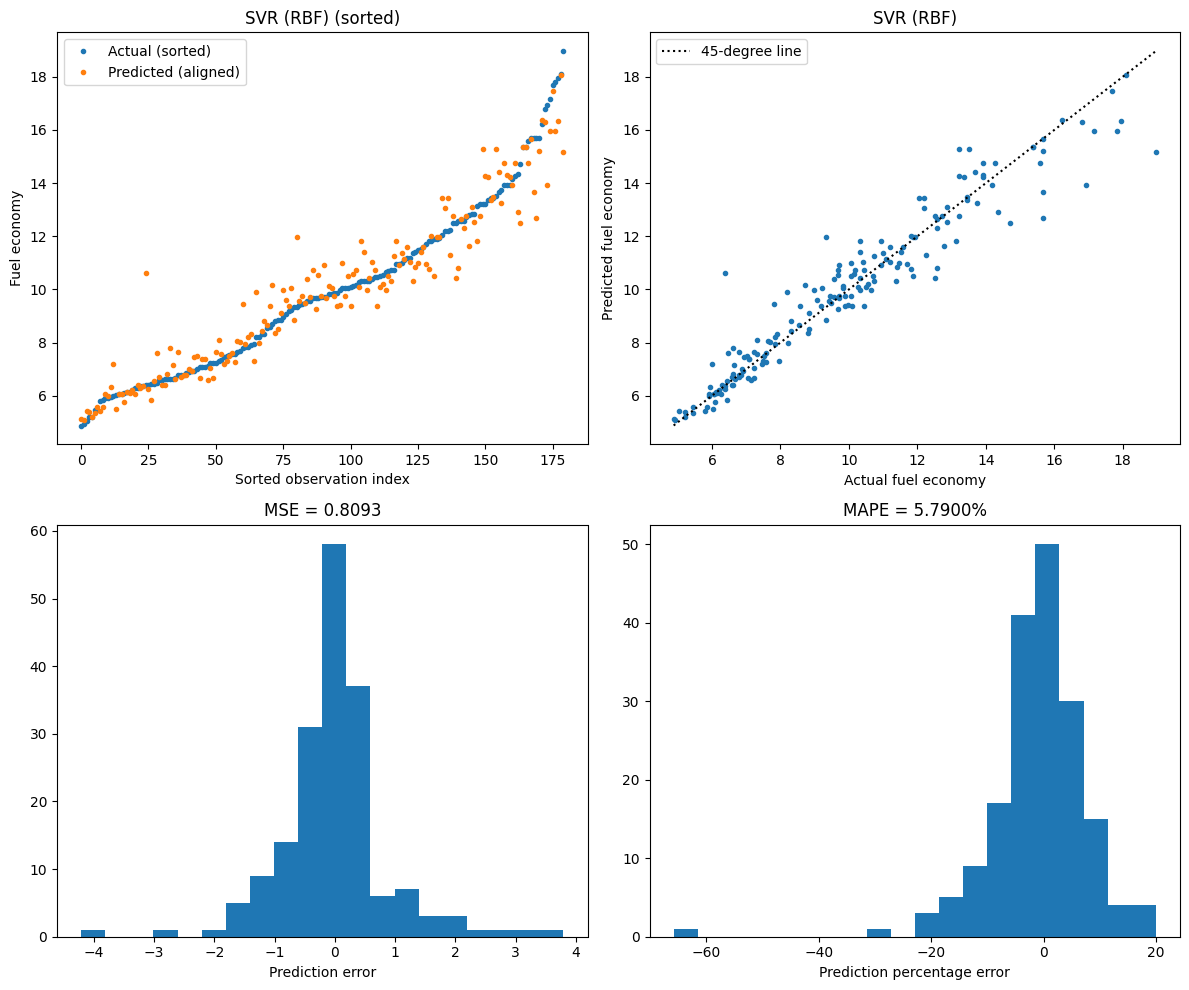

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

# 1) Load
carData = pd.read_csv('Ex02_4_carData.csv')

# 2) Target / features
X = carData.drop(columns=['FuelEcon'])
y = carData['FuelEcon']

# 3) One-hot encode (drop_first는 다중공선성 완화용)
X_encoded = pd.get_dummies(X, drop_first=True)

# 4) Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

# 5) SVR 파이프라인 (스케일링 + RBF 커널 SVR)
svr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=10.0, epsilon=0.2, gamma='scale'))
])
svr_pipe.fit(X_train, y_train)

# 6) Predict
y_pred = svr_pipe.predict(X_test)

# 7) 평가 플롯 함수 (네 코드 재사용)
def evaluate_fit(y_true, y_pred, name='SVR'):
    plt.figure(figsize=(12, 10))

    # 1. Actual vs Predicted (sorted by actual)
    plt.subplot(2, 2, 1)
    sorted_idx = np.argsort(y_true.values)
    y_true_sorted = y_true.values[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]
    plt.plot(y_true_sorted, '.', label='Actual (sorted)')
    plt.plot(y_pred_sorted, '.', label='Predicted (aligned)')
    plt.title(name + ' (sorted)')
    plt.xlabel('Sorted observation index')
    plt.ylabel('Fuel economy')
    plt.legend()

    # 2. Scatter: Pred vs Actual
    plt.subplot(2, 2, 2)
    plt.scatter(y_true, y_pred, marker='.')
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'k:', label='45-degree line')
    plt.title(name)
    plt.xlabel('Actual fuel economy')
    plt.ylabel('Predicted fuel economy')
    plt.legend()

    # 3. Error hist
    plt.subplot(2, 2, 3)
    err = y_true.values - y_pred
    mse = mean_squared_error(y_true, y_pred)
    plt.hist(err, bins=20)
    plt.title(f'MSE = {mse:.4f}')
    plt.xlabel('Prediction error')

    # 4. Percentage error hist
    plt.subplot(2, 2, 4)
    percentage_err = 100 * err / y_true.values
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    plt.hist(percentage_err, bins=20)
    plt.title(f'MAPE = {mape:.4f}%')
    plt.xlabel('Prediction percentage error')

    plt.tight_layout()
    plt.show()

# 8) 평가 호출
evaluate_fit(y_test, y_pred, 'SVR (RBF)')